<a href="https://colab.research.google.com/github/changsin/MediaEditor/blob/main/notebooks/edit_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sound of Silence



In [ ]:
!git clone https://github.com/changsin/MediaEditor.git

In [1]:
!pip install -q youtube-dl

     |████████████████████████████████| 1.9 MB 10.5 MB/s 


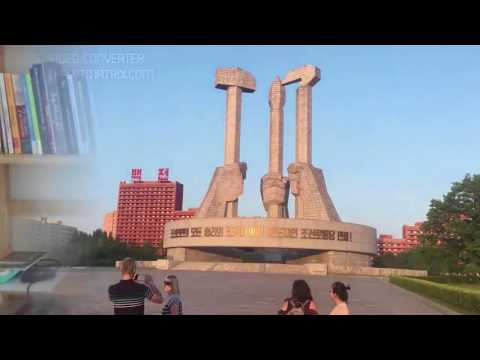

In [2]:
from IPython.display import YouTubeVideo

save_filename = "Vietnamese_Annie_NK_Trip"
youtube_id = 'zNBoeXpbm9s'
YouTubeVideo(youtube_id)

In [4]:
def download_youtube(youtube_id, save_filename):
  !youtube-dl -f 'bestvideo[ext=mp4]' --output $save_filename".%(ext)s" https://www.youtube.com/watch?v=$youtube_id

download_youtube(youtube_id, save_filename)

[youtube] zNBoeXpbm9s: Downloading webpage
[youtube] zNBoeXpbm9s: Downloading MPD manifest
[download] Destination: Vietnamese_Annie_NK_Trip.mp4
[download] 100% of 91.25MiB in 26:51


## Split video clips


In [5]:
import glob
import math
import os

from moviepy.editor import VideoFileClip, AudioFileClip, concatenate_videoclips
# from pydub import AudioSegment

DEFAULT_THRESHOLD = 65      # 65 for pydub, 0.01 for moviepy
DEFAULT_WINDOW_SIZE = 0.1


def split_video(file_in, path_out,
                threshold=DEFAULT_THRESHOLD,
                window_size=DEFAULT_WINDOW_SIZE):
  video_clip = VideoFileClip(file_in)
  video_end = video_clip.end

  n_windows = math.floor(video_end / window_size)
  print(f"Video: {file_in} Duration: {video_end} n_windows: {n_windows}")

  clips_to_save = []

  is_started = False
  start_time = 0
  end_time = 0

  for i in range(n_windows):
    sub_clip = video_clip.audio.subclip(i * window_size, (i + 1) * window_size)
    if sub_clip.max_volume() >= threshold:
      if is_prev_silence: # start speaking
          start_time = i * window_size

      is_prev_silence = False
    else:
      if is_started:  # speaking ended
          if i < n_windows - 1:
              # add one more window to capture the fade out effect
              end_time = (i + 1) * window_size
              i += 1
          else:
              end_time = video_end
          clips_to_save.append(video_clip.subclip(start_time, end_time))

      is_prev_silence = True

  edited_video = concatenate_videoclips(keep_clips)

  edited_video.write_videofile(
      'out.mp4',
      audio_codec='aac',
      threads=16
  )

  # If the audio track never fades out (kept talking till the end)
  #   take the rest of the audio track.
  # This can happen in two occasions:
  #   1. The entire audio clip is filled with noise - no kept clips
  #   2. There was a moment of silence in the middle but noise started and never ended in silence
  # if (len(clips_to_save) == 0 and start_time > 0) or end_time < start_time:
  #     clips_to_save.append(audio_clip.subclip(start_time, audio_end))

  # if len(clips_to_save) > 0:
  #     edited_audio = concatenate_audioclips(clips_to_save)
  #     print('Writing {} with duration {:.2f}'.format(file_out, edited_audio.end))
  #     edited_audio.write_audiofile(file_out)
  #     edited_audio.close()
  # else:
  #     print("###Empty clips ", file_in)

  video_clip.close()
  edited_video.close()

split_video('/content/Vietnamese_Annie_NK_Trip.mp4', './')

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3137536/45929032 bytes (6.8%)6758400/45929032 bytes (14.7%)10182656/45929032 bytes (22.2%)13180928/45929032 bytes (28.7%)16556032/45929032 bytes (36.0%)19922944/45929032 bytes (43.4%)23437312/45929032 bytes (51.0%)26697728/45929032 bytes (58.1%)30023680/45929032 bytes (65.4%)33226752/45929032 bytes (72.3%)36757504/45929032 bytes (80.0%)40165376/45929032 bytes (87.5%)

AttributeError: ignored

In [6]:
video_clip = VideoFileClip('/content/Vietnamese_Annie_NK_Trip.mp4')

In [7]:
video_clip.audio

In [8]:
!pip install moviepy